## **Naive Bayes Classifier From Scratch**

> **Implementing Naive Bayes Classifier. Naive Bayes is simple classifier known for doing well when a large number of observations are available. Here we shall create a Gaussian Naive Bayes classifier from the scratch and use it to predict the class of a previously unseen data point.**

### Why Naive Bayes Classifier?
> **Naive Bayes Classifier is a probabilistic algorithm used for classification tasks in machine learning. It is based on Bayes' theorem and assumes that the presence of a feature in a class is independent of the presence of any other feature.**

> **In simple terms, the Naive Bayes Classifier assumes that the probability of a particular class given some input features is proportional to the product of the probabilities of each feature given that class. This means that the algorithm calculates the conditional probabilities of each class given the input features, and selects the class with the highest probability as the predicted class.**

> **The Naive Bayes Classifier is often used in natural language processing (NLP) applications such as text classification and sentiment analysis. It is also commonly used in spam filtering, where the algorithm can be trained on a set of labeled emails to predict whether a new email is spam or not.**

> **One of the main advantages of the Naive Bayes Classifier is its simplicity and speed, making it suitable for large datasets and real-time applications. However, it assumes that the features are independent, which may not always be true in real-world applications, and can lead to inaccurate predictions.**

### What is Gaussian Naive Bayes Classifier?
> **Gaussian Naive Bayes Classifier is a variant of the Naive Bayes algorithm that assumes the input features follow a Gaussian (normal) distribution. In other words, it assumes that the input features are continuous variables, and the probability of each feature value is normally distributed.**

> **The Gaussian Naive Bayes Classifier is based on Bayes' theorem and uses the same principles as the standard Naive Bayes Classifier, but instead of calculating the probability of each feature given the class using a categorical distribution, it uses a Gaussian distribution to model the continuous values.**

> **To classify a new instance, the Gaussian Naive Bayes Classifier calculates the probability of each class given the input features, using the Gaussian probability density function to estimate the likelihood of each feature value given the class. It then selects the class with the highest probability as the predicted class.**

> **The advantages of the Gaussian Naive Bayes Classifier include its simplicity, speed, and ability to handle large datasets with high dimensional input features. However, it assumes that the input features are independent and have a Gaussian distribution, which may not always be true in real-world applications. Additionally, it may suffer from the problem of overfitting when the training data is limited or imbalanced.**

### Preliminaries

In [14]:
# importing required modules
import pandas as pd
import numpy as np

### Create Data

> **Creating our dataset and our dataset is containing data for eight individuals. We will use the dataset to construct a classifier that takes in the height, weight and foot size of an individual and outputs a prediction for their gender.**

In [15]:
# creating an empty data frame
data = pd.DataFrame()

# creating our target variables
data["gender"] = ["male","female","male","female","female","male","female","male"]

# creating our feature variables
data["height"] = [5.93, 5.43, 5.57, 5.74, 5.4, 6.1, 5.1, 5.91]
data["weight"] = [191, 131, 171, 149, 151, 181, 99, 166]
data["foot_size"] = [12, 6, 13, 8, 9, 13, 5, 11]

# view data
print (data.shape)
data

(8, 4)


,gender,height,weight,foot_size
0,male,5.93,191,12
1,female,5.43,131,6
2,male,5.57,171,13
3,female,5.74,149,8
4,female,5.40,151,9
5,male,6.10,181,13
6,female,5.10,99,5
7,male,5.91,166,11


In [16]:
# the above dataset is used to construct our classifier.
# creating an empty data frame
person = pd.DataFrame()

# now we shall create a new person for whom we know 
# their feature values but not the gender.
# our goal is to predict the gender
# creating the feature values for this single row
person["height"] = [7]
person["weight"] = [131]
person["foot_size"] = [7]

# view the data
print (person.shape)
person

(1, 3)


,height,weight,foot_size
0,7,131,7


### Bayes Theorem
> **Bayes theorem is a famous equation that allows us to make predictions based on data. Here is the classic version of the Bayes theorem:**<br>
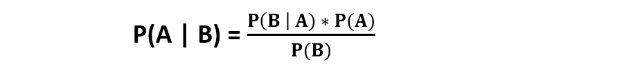

> **This might be too abstract, so let us replace some of the variables to make it more concrete. In a Bayes Classifier, we are interested in finding out the class (e.g. male or female, spam or ham) of an observation given the data:**<br>
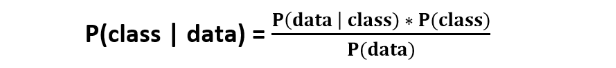
<br>**where:**
> * **class** is a particular class (e.g. male)
> * **data** is an observation’s data
> * **P(class | data)** is called the **_posterior_**
> * **P(data | class)** is called the **_likelihood_**
> * **P(class)** is called the **_prior_**
> * **P(data)** is called the **_marginal probability_**

> **In a Bayes Classifier, we calculate the posterior (technically we only calculate the numerator of the posterior, but ignore that for now) for every class for each observation. Then, classify the observation based on the class with the largest posterior value. In our example, we have one observation to predict and two possible classes (e.g. male and female), therefore we will calculate two posteriors: one for male and one for female.**
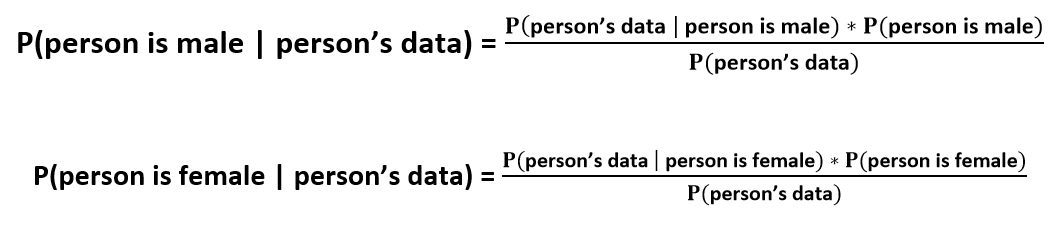

### Gaussian Naive Bayes Classifier
> **A Gaussian Naive Bayes is probably the most popular type of Bayes Classifier. To explain what the name means, let us look at what the Bayes equations looks like when we apply our two classes (male and female) and three feature variables (height, weight, and foot_size):**
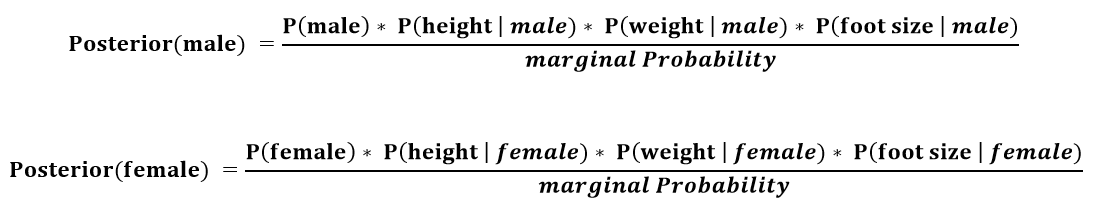

> **Now let us unpack the top equation a bit:**
> * **P(male)** is the prior probabilities. It is, as we can see, simply the probability an observation is male. This is just the number of males in the dataset divided by the total number of people in the dataset.
> * **P(height | female)P(weight | female)P(foot_size | female)** is the likelihood. Notice that we have unpacked so it is now every feature in the dataset. The “gaussian” and “naive” come from two assumptions present in this likelihood:
> * **1.** If you look each term in the likelihood you will notice that we assume each feature is uncorrelated from each other. That is, foot size is independent of weight or height etc. This is obviously not true, and is a “naive” assumption - hence the name “Naive Bayes.”
> * **2.** Second, we have assumed that the value of the features (e.g. the height of women, the weight of women) are normally (gaussian) distributed. This means that P(height | female) is calculated by inputing the required parameters into the probability density function of the normal distribution:
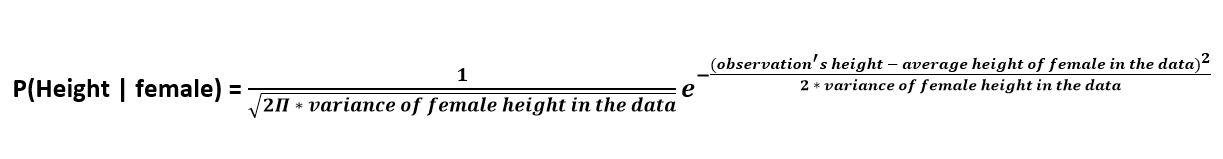
> * Marginal probability is probably one of the most confusing parts of Bayesian approaches. In our example, it is completely possible to calculate the marginal probability. However, in many real-world cases, it is either extremely difficult or impossible to find the value of the marginal probability. Here in this example, we shall only calculate which class has a the highest posterior value. And because the marginal probability is the same for all classes. So,
> * **1.** We can ignore the denominator, 
> * **2.** Calculate only the posterior’s numerator for each class, and
> * **3.** Pick the largest numerator.<br>
That is, we can ignore the posterior’s denominator and make a prediction solely on the relative values of the posterior’s numerator.

### Calculating Prior Values

In [17]:
# we shall calculate the prior for both male and female genders
# prior can be either constants or probability distributions. 
# In our example is the simply the probability of being the gender

# Number of males
n_male = data["gender"][data["gender"] == "male"].count()

# Number of females
n_female = data["gender"][data["gender"] == "female"].count()

# total rows
total_people = data["gender"].count()
print (f"Count of male = {n_male}, female = {n_female} and all persons = {total_people}")

Count of male = 4, female = 4 and all persons = 8


In [18]:
# number of males divided by the total number of candidates
p_male = n_male/total_people   # prior for male

# number of females divided by the total number of candidates
p_female = n_female/total_people   # prior for female

print(f"Prior for male = {p_male} and female = {p_female}")

Prior for male = 0.5 and female = 0.5


> **Remember that each term (e.g. P(height | female)) in our likelihood is assumed to be a Normal Probability Distribution Function (PDF). For example:**
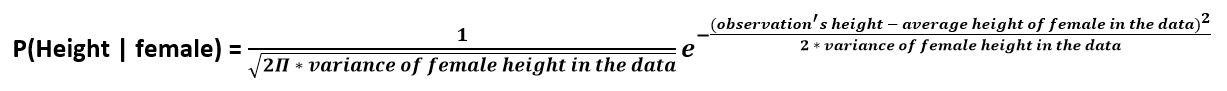
> **This means that for each class (e.g. female) and feature (e.g. height) combination we need to calculate the variance and mean value from the data. Pandas makes this easy:**

In [19]:
# now doing group by gender and calculate the mean of each feature
data_means = data.groupby("gender").mean()

# view the values
data_means

,height,weight,foot_size
gender,,,
female,5.4175,132.50,7.00
male,5.8775,177.25,12.25


In [20]:
# now doing group by gender and calculate variance of each feature
data_variances = data.groupby("gender").var()

# view the values
data_variances

,height,weight,foot_size
gender,,,
female,0.068425,579.666667,3.333333
male,0.049292,122.916667,0.916667


In [21]:
data_means["height"][data_means.index == "male"].values[0]

5.8774999999999995

In [22]:
# mean for the male candidates
male_height_mean = data_means["height"][data_means.index == "male"].values[0]
male_weight_mean = data_means["weight"][data_means.index == "male"].values[0]
male_footsize_mean = data_means["foot_size"][data_means.index == "male"].values[0]

print(f"So mean male height = {male_height_mean}, weight = {male_weight_mean} and footsize = {male_footsize_mean}")

So mean male height = 5.8774999999999995, weight = 177.25 and footsize = 12.25


In [23]:
# variance for the male candidates
male_height_var = data_variances["height"][data_variances.index == "male"].values[0]
male_weight_var = data_variances["weight"][data_variances.index == "male"].values[0]
male_footsize_var = data_variances["foot_size"][data_variances.index == "male"].values[0]

print(f"So variance male height = {male_height_var}, weight = {male_weight_var} and footsize = {male_footsize_var}")

So variance male height = 0.049291666666666595, weight = 122.91666666666667 and footsize = 0.9166666666666665


In [24]:
# mean for the female candidates
female_height_mean = data_means["height"][data_means.index == "female"].values[0]
female_weight_mean = data_means["weight"][data_means.index == "female"].values[0]
female_footsize_mean = data_means["foot_size"][data_means.index == "female"].values[0]

print(f"So mean female height = {female_height_mean}, weight = {female_weight_mean} and footsize = {female_footsize_mean}")

So mean female height = 5.4175, weight = 132.5 and footsize = 7.0


In [25]:
# variance for the female candidates
female_height_var = data_variances["height"][data_variances.index == "female"].values[0]
female_weight_var = data_variances["weight"][data_variances.index == "female"].values[0]
female_footsize_var = data_variances["foot_size"][data_variances.index == "female"].values[0]

print(f"So variance female height = {female_height_var}, weight = {female_weight_var} and footsize = {female_footsize_var}")

So variance female height = 0.06842500000000018, weight = 579.6666666666666 and footsize = 3.3333333333333335


> 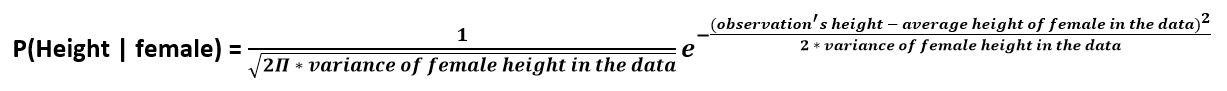
> **Finally, we need to create a function to calculate the probability density of each of the terms of the likelihood
(e.g. P(height | female))**

In [26]:
# writing one user defined function which will calculate p(X|Y)

def p_x_given_y (x, mean_y, var_y) :
    # inputting the arguments into the probability density function
    p = (1 / np.sqrt(2 * np.pi * var_y)) * np.exp(-(x - mean_y) ** 2 / (2 * var_y))
    
    # returing the value of p
    return p

In [27]:
# now applying bayes classifier to a new data point
# calculating numerator part of the posterior if unclassified 
# observation is male

# numerator of the posterior = P(male) p(height ∣ male) p(weight ∣ male) p(foot size ∣ male)
num_posterior_male = p_male * \
                     p_x_given_y(person["height"][0], male_height_mean, male_height_var)* \
                     p_x_given_y(person["weight"][0], male_weight_mean, male_weight_var)* \
                     p_x_given_y(person["foot_size"][0], male_footsize_mean, male_footsize_var)

print (f"Numerator part of posterior for male is {num_posterior_male}")

Numerator part of posterior for male is 1.864197774747369e-18


In [28]:
# calculating numerator part of the posterior if unclassified 
# observation is female

# numerator of the posterior = P(female) p(height ∣ female) p(weight ∣ female) p(foot size ∣ female)
num_posterior_female = p_female * \
                       p_x_given_y(person["height"][0], female_height_mean, female_height_var)*\
                       p_x_given_y(person["weight"][0], female_weight_mean, female_weight_var)*\
                       p_x_given_y(person["foot_size"][0], female_footsize_mean, female_footsize_var)

print (f"Numerator part of posterior for female is {num_posterior_female}")

Numerator part of posterior for female is 3.110191185294051e-11


In [29]:
# as numerator part of the posterior for female is higher than 
# the same for male, so we predict that the person is female

if (num_posterior_female > num_posterior_male):
    print ("Prediction is female...")
else:
    print ("Prediction is male")

Prediction is female...


In [30]:
data

,gender,height,weight,foot_size
0,male,5.93,191,12
1,female,5.43,131,6
2,male,5.57,171,13
3,female,5.74,149,8
4,female,5.40,151,9
5,male,6.10,181,13
6,female,5.10,99,5
7,male,5.91,166,11


### Implementing Using  GaussianNB() Class

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes Classifier object
gnb = GaussianNB()

# Extracting X_train and y_train
X_train = data.drop("gender", axis = 1)
y_train = data.gender.replace({"female":0, "male":1})

print (y_train)
X_train

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
Name: gender, dtype: int64


,height,weight,foot_size
0,5.93,191,12
1,5.43,131,6
2,5.57,171,13
3,5.74,149,8
4,5.40,151,9
5,6.10,181,13
6,5.10,99,5
7,5.91,166,11


In [32]:
# Train the model using the training set
gnb.fit(X_train, y_train)

# Make predictions on the testing set
X_test = person.copy()
y_pred = gnb.predict(X_test)
y_pred_str = "Female" if (y_pred[0] == 0) else "Male"
print (f"So predicted value is {y_pred} that is {y_pred_str}...")

So predicted value is [0] that is Female...


In [33]:
# Calculate the accuracy of the model
y_pred = gnb.predict(X_train)
print (np.array(y_train))
print (y_pred)
accuracy = accuracy_score(y_train, y_pred)

# Print the accuracy of the model
print("Accuracy %:", accuracy * 100)

[1 0 1 0 0 1 0 1]
[1 0 1 0 0 1 0 1]
Accuracy %: 100.0
